In [76]:
import yfinance as yf
import os
import pyfolio as pf
import pandas as pd
import numpy as np
#os.chdir('C:/Users/10265729/Desktop/Pratik/Data Science Bootcamp/Project 1')
from datetime import datetime

import matplotlib.pyplot as plt
import warnings

In [77]:
def download_data(stock, start, end):
    data = yf.download(stock, start, end)
    return data

In [78]:
stocks = ['SPY', 'QQQ','GLD', 'TIP', 'VWO']
data = download_data(stocks, '2000-1-1', '2023-1-30')
data.to_csv('Mul.csv')


[*********************100%***********************]  5 of 5 completed


In [87]:
data.dropna()
data['Pct_Change_SPY'] = data['Close']['SPY'].pct_change()
spy_std = data['STDEV_SPY'] = data['Pct_Change_SPY'].rolling(window=2).std()
data['Pct_Change_QQQ'] = data['Close']['QQQ'].pct_change()
qqq_std = data['STDEV_QQQ'] = data['Pct_Change_QQQ'].rolling(window=2).std()
data['Pct_Change_GLD'] = data['Close']['GLD'].pct_change()
data['Pct_Change_TIP'] = data['Close']['TIP'].pct_change()
data['Pct_Change_VWO'] = data['Close']['VWO'].pct_change()
data["Year"] = data.index.year.to_list()
data

Adj Close                                                 \
                   GLD         QQQ         SPY         TIP        VWO   
Date                                                                    
2000-01-03         NaN   81.471100   95.308792         NaN        NaN   
2000-01-04         NaN   75.882088   91.581642         NaN        NaN   
2000-01-05         NaN   73.947388   91.745476         NaN        NaN   
2000-01-06         NaN   68.868881   90.270966         NaN        NaN   
2000-01-07         NaN   77.386795   95.513588         NaN        NaN   
...                ...         ...         ...         ...        ...   
2023-01-23  179.630005  288.959991  400.630005  108.550003  42.799999   
2023-01-24  180.279999  288.369995  400.200012  109.169998  42.840000   
2023-01-25  181.110001  287.730011  400.350006  109.389999  42.849998   
2023-01-26  179.470001  293.339996  404.750000  109.379997  43.180000   
2023-01-27  179.220001  296.260010  405.679993  109.139999  42.889999   

                 Close                                                 ...  \
                   GLD         QQQ         SPY         TIP        VWO  ...   
Date                                                                   ...   
2000-01-03         NaN   94.750000  145.437500         NaN        NaN  ...   
2000-01-04         NaN   88.250000  139.750000         NaN        NaN  ...   
2000-01-05         NaN   86.000000  140.000000         NaN        NaN  ...   
2000-01-06         NaN   80.093750  137.750000         NaN        NaN  ...   
2000-01-07         NaN   90.000000  145.750000         NaN        NaN  ...   
...                ...         ...         ...         ...        ...  ...   
2023-01-23  179.630005  288.959991  400.630005  108.550003  42.799999  ...   
2023-01-24  180.279999  288.369995  400.200012  109.169998  42.840000  ...   
2023-01-25  181.110001  287.730011  400.350006  109.389999  42.849998  ...   
2023-01-26  179.470001  293.339996  404.750000  109.379997  43.180000  ...   
2023-01-27  179.220001  296.260010  405.679993  109.139999  42.889999  ...   

               Volume             Pct_Change_SPY STDEV_SPY Pct_Change_QQQ  \
                  TIP         VWO                                           
Date                                                                        
2000-01-03        NaN         NaN            NaN       NaN            NaN   
2000-01-04        NaN         NaN      -0.039106       NaN      -0.068602   
2000-01-05        NaN         NaN       0.001789  0.028917      -0.025496   
2000-01-06        NaN         NaN      -0.016071  0.012629      -0.068677   
2000-01-07        NaN         NaN       0.058076  0.052430       0.123683   
...               ...         ...            ...       ...            ...   
2023-01-23  3170400.0  13000000.0       0.011999  0.004688       0.022216   
2023-01-24  2913900.0  13591800.0      -0.001073  0.009243      -0.002042   
2023-01-25  2996900.0   8435800.0       0.000375  0.001024      -0.002219   
2023-01-26  4193500.0  10829900.0       0.010990  0.007506       0.019497   
2023-01-27  2408700.0  11908200.0       0.002298  0.006147       0.009954   

           STDEV_QQQ Pct_Change_GLD Pct_Change_TIP Pct_Change_VWO  Year  
                                                                         
Date                                                                     
2000-01-03       NaN            NaN            NaN            NaN  2000  
2000-01-04       NaN            NaN            NaN            NaN  2000  
2000-01-05  0.030480            NaN            NaN            NaN  2000  
2000-01-06  0.030534            NaN            NaN            NaN  2000  
2000-01-07  0.136019            NaN            NaN            NaN  2000  
...              ...            ...            ...            ...   ...  
2023-01-23  0.003642       0.001896      -0.000920       0.007296  2023  
2023-01-24  0.017153       0.003619       0.005712       0.000935  2023  
2023

In [80]:
spy = (data['Pct_Change_SPY']+1).cumprod()
qqq = (data['Pct_Change_QQQ']+1).cumprod()
gld = (data['Pct_Change_GLD']+1).cumprod()
tip = (data['Pct_Change_TIP']+1).cumprod()
vwo = (data['Pct_Change_VWO']+1).cumprod()

In [72]:
print(f'SPY {spy*100}')
print(f'QQQ {qqq*100}')
print(f'GLD {gld*100}')
print(f'TIP {tip*100}')
print(f'VWO {vwo*100}')

SPY Date
2000-01-03           NaN
2000-01-04     96.089385
2000-01-05     96.261281
2000-01-06     94.714224
2000-01-07    100.214869
                 ...    
2023-01-23    275.465409
2023-01-24    275.169755
2023-01-25    275.272888
2023-01-26    278.298238
2023-01-27    278.937683
Name: Pct_Change_SPY, Length: 5805, dtype: float64
QQQ Date
2000-01-03           NaN
2000-01-04     93.139842
2000-01-05     90.765172
2000-01-06     84.531662
2000-01-07     94.986807
                 ...    
2023-01-23    304.970967
2023-01-24    304.348280
2023-01-25    303.672835
2023-01-26    309.593664
2023-01-27    312.675472
Name: Pct_Change_QQQ, Length: 5805, dtype: float64
GLD Date
2000-01-03           NaN
2000-01-04           NaN
2000-01-05           NaN
2000-01-06           NaN
2000-01-07           NaN
                 ...    
2023-01-23    404.754395
2023-01-24    406.219005
2023-01-25    408.089221
2023-01-26    404.393864
2023-01-27    403.830547
Name: Pct_Change_GLD, Length: 5805, dtype: flo

Completed Analysis Uploaded to GitHub (20 points) 
- Merge all the files by date to compare and contrast all major ETF's and analyze there returns by using Entry and Exit rules for Moving Average or simpely buying and sitting on it for 20 years
- Return(Simple Retruns, Daily - Current day / Prev day)
- Standard dev on return - Can tell us volatility
- All Stat analysis on returns (using pyflio library)

** Which of the 5 ETF's is most volatile and returns (graph)
** Best overall retruns
** 


Final data analysis contains ample and complete information in README file (10 points)
- Gather our findings 

Final repository is acceptable for professional quality presentation (10 points)
- In notebook
Visualizations (20 points)
6–8 visualizations of data (at least two per question) (10 points)
 - Use PyFolio library (tear sheet - This library alone will get us 10 plus visulazation)
 - Retruns charts
 - STDEV charts
 - Regression charts


Clear and accurate labeling of images (5 points)
Visualizations supported with ample and precise explanation (5 points)
Analysis and Conclusion (20 points)
- Which ever etf provides best returns with lowest risk will get most amount of allocation from portfolio

Write-up summarizes major findings and implications at a professional level (5 points)
Each question in the project proposal is answered with precise descriptions and findings (5 points)
Findings are strongly supported with numbers and visualizations (5 points)
Each question response is supported with a well-discerned statistical analysis from lessons (e.g., aggregation, correlation, comparison, summary statistics, sentiment analysis, and time series analysis) (5 points)
Group Presentation (20 points)
All group members spoke during the presentation (5 points)
Group was well prepared (5 points)
Presentation is relevant to material (5 points)
Presentation maintains audience interest (5 points)
Slide Deck (20 points)
Slides are visually clean and professional (5 points)
Slides are relevant to material (5 points)
Slides effectively demonstrate the project (5 points)
Slides are clear and maintain audience interest (5 points)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


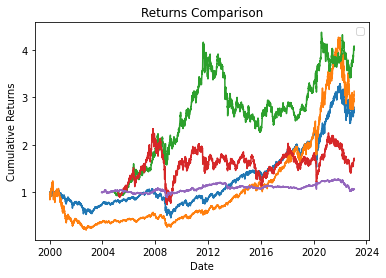

In [73]:

plt.plot(spy)
plt.plot(qqq)
plt.plot(gld)
plt.plot(vwo)
plt.plot(tip)

plt.ylabel('Cumulative Returns')
plt.xlabel('Date')
plt.title('Returns Comparison')
plt.legend()
plt.show()

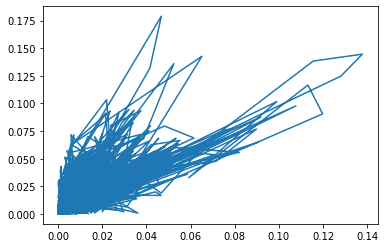

In [82]:
plt.plot(spy_std, qqq_std)


# plt.plot(qqq_std)

In [35]:
pf.create_full_tear_sheet(data['strategy_returns'])

Adj Close                                                 \
                   GLD         QQQ         SPY         TIP        VWO   
Date                                                                    
2000-01-03         NaN   81.471107   95.308815         NaN        NaN   
2000-01-04         NaN   75.882057   91.581657         NaN        NaN   
2000-01-05         NaN   73.947388   91.745438         NaN        NaN   
2000-01-06         NaN   68.868881   90.270958         NaN        NaN   
2000-01-07         NaN   77.386818   95.513626         NaN        NaN   
...                ...         ...         ...         ...        ...   
2023-01-23  179.630005  288.959991  400.630005  108.550003  42.799999   
2023-01-24  180.279999  288.369995  400.200012  109.169998  42.840000   
2023-01-25  181.110001  287.730011  400.350006  109.389999  42.849998   
2023-01-26  179.470001  293.339996  404.750000  109.379997  43.180000   
2023-01-27  179.220001  296.260010  405.679993  109.139999  42.889999   

                 Close                                                 ...  \
                   GLD         QQQ         SPY         TIP        VWO  ...   
Date                                                                   ...   
2000-01-03         NaN   94.750000  145.437500         NaN        NaN  ...   
2000-01-04         NaN   88.250000  139.750000         NaN        NaN  ...   
2000-01-05         NaN   86.000000  140.000000         NaN        NaN  ...   
2000-01-06         NaN   80.093750  137.750000         NaN        NaN  ...   
2000-01-07         NaN   90.000000  145.750000         NaN        NaN  ...   
...                ...         ...         ...         ...        ...  ...   
2023-01-23  179.630005  288.959991  400.630005  108.550003  42.799999  ...   
2023-01-24  180.279999  288.369995  400.200012  109.169998  42.840000  ...   
2023-01-25  181.110001  287.730011  400.350006  109.389999  42.849998  ...   
2023-01-26  179.470001  293.339996  404.750000  109.379997  43.180000  ...   
2023-01-27  179.220001  296.260010  405.679993  109.139999  42.889999  ...   

               Volume                                             \
                  GLD       QQQ       SPY        TIP         VWO   
Date                                                               
2000-01-03        NaN  36345200   8164300        NaN         NaN   
2000-01-04        NaN  33786600   8089800        NaN         NaN   
2000-01-05        NaN  42496600  12177900        NaN         NaN   
2000-01-06        NaN  37134800   6227200        NaN         NaN   
2000-01-07        NaN  28138200   8066500        NaN         NaN   
...               ...       ...       ...        ...         ...   
2023-01-23  5265500.0  52799900  84178800  3170400.0  13000000.0   
2023-01-24  4604600.0  44875100  59524900  2913900.0  13591800.0   
2023-01-25  6925300.0  50872000  84800300  2996900.0   8435800.0   
2023-01-26  5860100.0  51596300  72287400  4193500.0  10829900.0   
2023-01-27  5446400.0  56161500  68280700  2408700.0  11908200.0   

           Pct_Change_SPY Pct_Change_QQQ Pct_Change_GLD Pct_Change_TIP  \
                                                                         
Date                                                                     
2000-01-03            NaN            NaN            NaN            NaN   
2000-01-04      -0.039106      -0.068602            NaN            NaN   
2000-01-05       0.001789      -0.025496            NaN            NaN   
2000-01-06      -0.016071      -0.068677            NaN            NaN   
2000-01-07       0.058076       0.123683            NaN            NaN   
...                   ...            ...            ...            ...   
2023-01-23       0.011999       0.022216       0.001896      -0.000920   
2023-01-24      -0.001073      -0.002042       0.003619       0.005712   
2023-01-25       0.000375      -0.002219       0.004604       0.002015   
2023-01-26       0.010990       0.019497      -0.009055 

In [83]:
spy_std

Date
2000-01-03         NaN
2000-01-04         NaN
2000-01-05    0.028917
2000-01-06    0.012629
2000-01-07    0.052430
                ...   
2023-01-23    0.004688
2023-01-24    0.009243
2023-01-25    0.001024
2023-01-26    0.007506
2023-01-27    0.006147
Name: Pct_Change_SPY, Length: 5805, dtype: float64